In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
img = np.load("X.npy")

In [27]:
type(img[0])
img[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

This shows that we have 2062 samples in our dataset and each image is 64 x 64 pixels

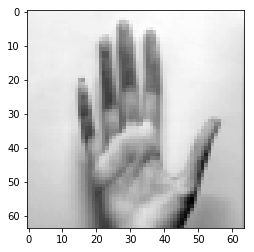

In [19]:
for i in range(2062):
    plt.imshow(img[i],cmap='gray')

In [20]:
labels = np.load("Y.npy")

In [23]:
len(labels)

2062

In [35]:
img1= img.reshape(img.shape[0], 64,64,1)

In [29]:
img1.shape


(2062, 64, 64, 1)

In [32]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_tar, test_tar = train_test_split(img1,labels,test_size=0.2,shuffle=True)

### CNN 

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

num_classes = labels.shape[1]
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(64,64,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [41]:

# build the model
model = baseline_model()
# Fit the model
model.fit(train_data, train_tar, validation_data=(test_data, test_tar), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(test_data,test_tar, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 1649 samples, validate on 413 samples
Epoch 1/10
 - 5s - loss: 2.6326 - acc: 0.1073 - val_loss: 2.2892 - val_acc: 0.1041
Epoch 2/10
 - 5s - loss: 2.2615 - acc: 0.1844 - val_loss: 2.2174 - val_acc: 0.2978
Epoch 3/10
 - 5s - loss: 2.1656 - acc: 0.3984 - val_loss: 2.1183 - val_acc: 0.3971
Epoch 4/10
 - 4s - loss: 2.0588 - acc: 0.4203 - val_loss: 1.9969 - val_acc: 0.4722
Epoch 5/10
 - 5s - loss: 1.9076 - acc: 0.5203 - val_loss: 1.8443 - val_acc: 0.4891
Epoch 6/10
 - 5s - loss: 1.7338 - acc: 0.5494 - val_loss: 1.6693 - val_acc: 0.5617
Epoch 7/10
 - 5s - loss: 1.5468 - acc: 0.6204 - val_loss: 1.4920 - val_acc: 0.6077
Epoch 8/10
 - 5s - loss: 1.3486 - acc: 0.6495 - val_loss: 1.3093 - val_acc: 0.6174
Epoch 9/10
 - 5s - loss: 1.1675 - acc: 0.6719 - val_loss: 1.1346 - val_acc: 0.7046
Epoch 10/10
 - 5s - loss: 1.0216 - acc: 0.7035 - val_loss: 1.0703 - val_acc: 0.6828
CNN Error: 31.72%


In [42]:
def larger_model():
	# create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(64,64,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [43]:
model = larger_model()
# Fit the model
model.fit(train_data, train_tar, validation_data=(test_data, test_tar), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(test_data, test_tar, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 1649 samples, validate on 413 samples
Epoch 1/10
1649/1649 [==============================] - 6s 4ms/step - loss: 2.3010 - acc: 0.1346 - val_loss: 2.2664 - val_acc: 0.2615
Epoch 2/10
1649/1649 [==============================] - 5s 3ms/step - loss: 2.2042 - acc: 0.2959 - val_loss: 2.0852 - val_acc: 0.3705
Epoch 3/10
1649/1649 [==============================] - 6s 3ms/step - loss: 1.9128 - acc: 0.4257 - val_loss: 1.6352 - val_acc: 0.5763
Epoch 4/10
1649/1649 [==============================] - 5s 3ms/step - loss: 1.4344 - acc: 0.5731 - val_loss: 1.1594 - val_acc: 0.6538
Epoch 5/10
1649/1649 [==============================] - 6s 3ms/step - loss: 1.0416 - acc: 0.6798 - val_loss: 0.9357 - val_acc: 0.6925
Epoch 6/10
1649/1649 [==============================] - 6s 3ms/step - loss: 0.8324 - acc: 0.7271 - val_loss: 0.7918 - val_acc: 0.7361
Epoch 7/10
1649/1649 [==============================] - 6s 3ms/step - loss: 0.6918 - acc: 0.7647 - val_loss: 0.8014 - val_acc: 0.7191
Epoch 8/10
1649